# Group 10 : Topic 3 MULTI LAYER PERCEPTRON (MLP)

### Necessary imports

In [3]:
import tqdm
import numpy as np
import ast
import os
import sys
import matplotlib.pyplot as plt

## a) Definition of the method

## b) Simple example 

To explain how the MLP works, we will use a simple example using blobs from the sklearn dataset.

First, let's import the right package from sklearn datasets

In [4]:
from sklearn.datasets import make_blobs

Now, let's generate blobs as we did in the Lab 2 : 

In [5]:
x, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)
print(x)
print(y)
print(f"the shape of x is {x.shape}")
print(f"the shape of y is {y.shape}")

[[-0.70564499  8.55139891]
 [-0.99796039  3.16403005]
 [ 2.82667347  1.92710249]
 ...
 [-1.01966506  2.80165256]
 [-1.79775432  6.73688929]
 [10.48310534 -3.73727439]]
[3 2 1 1 0 0 4 0 0 1 4 3 1 0 0 0 4 1 0 0 4 4 2 1 2 3 2 3 4 4 0 4 4 1 4 4 1
 3 4 4 1 2 3 1 0 2 0 2 0 3 1 0 3 0 0 4 0 4 0 1 0 4 4 0 0 3 3 1 2 4 2 0 4 2
 1 4 4 1 1 1 3 2 4 2 1 0 3 4 4 0 0 2 3 1 0 0 3 2 2 2 3 2 2 4 2 0 0 4 2 0 0
 0 2 0 1 0 4 2 4 0 0 2 3 3 2 0 1 1 3 4 1 3 1 4 3 0 1 0 0 0 1 4 4 4 2 1 2 0
 3 3 1 0 1 4 1 0 1 0 1 4 3 0 2 3 1 1 0 0 0 0 2 3 4 0 1 4 2 2 1 4 4 1 3 3 0
 3 0 1 0 3 3 3 2 1 3 4 0 4 2 3 2 4 4 1 4 2 3 4 0 3 3 1 4 3 0 3 0 4 3 0 2 2
 1 1 4 1 4 1 0 1 3 4 0 0 3 1 4 4 0 1 0 0 2 4 4 3 1 2 2 0 2 2 1 1 4 4 1 3 0
 1 4 4 0 2 0 1 4 0 2 4 2 0 2 4 4 2 0 4 1 4 4 3 1 1 1 3 3 4 0 4 2 4 0 3 2 2
 3 0 4 3 4 1 1 0 3 1 2 4 1 4 3 1 0 2 0 0 0 4 1 4 0 3 4 0 2 0 4 1 4 4 0 2 2
 3 2 2 1 3 3 2 3 4 0 3 0 4 0 3 1 3 1 3 2 3 1 1 1 4 1 0 4 2 4 4 0 0 0 1 2 4
 2 4 4 3 0 4 1 2 1 2 1 4 1 4 3 4 0 4 2 2 1 4 3 2 3 4 3 1 4 2 3 4 1 1 0 2 4
 4 3 2 

Here, we generated 1000 samples of data (2D) and grouped them into 3 groups. 

Now, let's plot the data according to the cluster they are assigned to.

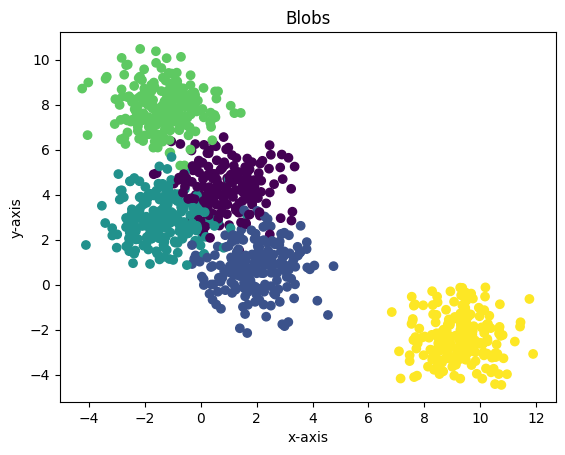

In [6]:
%matplotlib inline
plt.scatter(x[:,0], x[:,1], c = y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Blobs")
plt.show()

Now let's train this blobs with the MLP so that it learns how to predict the cluster a data point belongs to.

First, let's import the necessary functions needed to split the data into a training set and a test set.

In [7]:
from sklearn.model_selection import train_test_split

Now, let's divide the data into a training set and a test set : 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Here, the training set represents 80% of the data while the test set represents 20% of the data.

### Use of the Multi Layer Perceptron to classify this dataset

In [89]:
from sklearn.neural_network import MLPClassifier


# for k in (['identity', 'logistic', 'tanh', 'relu']):
#val_k=np.round(np.logspace(1, 3, 2).astype(int))
val_nb_layer=np.arange(1,51,2)
val_nb_neurones=np.arange(1,51,2)
val_test=np.array([])
val_train=np.array([])
for i in val_nb_layer:
    for k in val_nb_neurones:
        
        hidden_layer_sizes = tuple([k] * i)
    # for k in (100,1000,100):
    # creation of the classifier 
    # classifier = MLPClassifier(activation=k, random_state = 0, max_iter=300)
    # classifier = MLPClassifier( random_state = 0, max_iter=k)
        classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state = 0, max_iter=300)

        # Training the classifier
        classifier.fit(x_train, y_train)

        # Accuracy of the classifier on the training set
        training_set_accuracy = classifier.score(x_train, y_train)
        print(f"Accuracy of the classifier on the training set: {classifier.score(x_train, y_train)}")
        val_train=np.append(val_train, classifier.score(x_train, y_train))

        # Accuracy of the classifier on the test set
        test_set_accuracy = classifier.score(x_test, y_test)
        print(f"Accuracy of the classifier on the test set: {classifier.score(x_test, y_test)}")
        val_test=np.append(val_test,classifier.score(x_test, y_test))

"""
    plt.title("Accuracy of the classifier on the training set and test set by changing the maximum of iterations ")
    plt.plot(val_k, val_test, label='val_test')
    plt.plot(val_k,val_train, label='val_train')

    plt.xlabel('maximum of iterations')
    plt.ylabel('Accuracy of the classifier on the training set and test set')
    plt.legend()
    plt.show()

    """

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.54125
Accuracy of the classifier on the test set: 0.605


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.77
Accuracy of the classifier on the test set: 0.77


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.87875
Accuracy of the classifier on the test set: 0.88


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.90125
Accuracy of the classifier on the test set: 0.89


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9425
Accuracy of the classifier on the test set: 0.93


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94125
Accuracy of the classifier on the test set: 0.935


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94625
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94375
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.93125
Accuracy of the classifier on the test set: 0.92


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.93875
Accuracy of the classifier on the test set: 0.94


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.95


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9425
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94125
Accuracy of the classifier on the test set: 0.95


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94875
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94625
Accuracy of the classifier on the test set: 0.94


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.95


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94625
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94625
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94875
Accuracy of the classifier on the test set: 0.94


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94875
Accuracy of the classifier on the test set: 0.94


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.19875
Accuracy of the classifier on the test set: 0.205


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.87
Accuracy of the classifier on the test set: 0.855


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.8625
Accuracy of the classifier on the test set: 0.875


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.955
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94875
Accuracy of the classifier on the test set: 0.95


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.95


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95625
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.955
Accuracy of the classifier on the test set: 0.955
Accuracy of the classifier on the training set: 0.955
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.9575
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.9525
Accu

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.4025
Accuracy of the classifier on the test set: 0.38


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.83875
Accuracy of the classifier on the test set: 0.855


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.95


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.93375
Accuracy of the classifier on the test set: 0.96


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95625
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.96
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.955
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.9575
Accuracy 

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9325
Accuracy of the classifier on the test set: 0.915


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.8775
Accuracy of the classifier on the test set: 0.855
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.9575
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95625
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.957

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.88
Accuracy of the classifier on the test set: 0.88
Accuracy of the classifier on the training set: 0.205
Accuracy of the classifier on the test set: 0.18
Accuracy of the classifier on the training set: 0.96
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.95625
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95625
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.9575
Accuracy of

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.88
Accuracy of the classifier on the test set: 0.89


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9
Accuracy of the classifier on the test set: 0.9


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.94875
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.95375

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94875
Accuracy of the classifier on the test set: 0.945


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.87125
Accuracy of the classifier on the test set: 0.88
Accuracy of the classifier on the training set: 0.95875
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.93875
Accuracy of the classifier on the test set: 0.915
Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.955
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.96
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.9575
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.9375
Accu

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.5925
Accuracy of the classifier on the test set: 0.61


/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.87375
Accuracy of the classifier on the test set: 0.88
Accuracy of the classifier on the training set: 0.95875
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95125
Accuracy of the classifier on the test set: 0.925
Accuracy of the classifier on the training set: 0.93375
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.95625
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.9575
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.9575
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.96125
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.20625
Accuracy of the classifier on the test set: 0.175
Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.9475
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.955
Accuracy of the classifier on the test set: 0.95
Accuracy of the classifier on the training set: 0.9625
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95625
Accuracy of the classifier on the test set: 0.945
Accuracy of the classifier on the training set: 0.94875
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.9625
A

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.9125
Accuracy of the classifier on the test set: 0.905
Accuracy of the classifier on the training set: 0.39875
Accuracy of the classifier on the test set: 0.405
Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.9225
Accuracy of the classifier on the test set: 0.92
Accuracy of the classifier on the training set: 0.9375
Accuracy of the classifier on the test set: 0.925
Accuracy of the classifier on the training set: 0.93125
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.92
Accuracy of the classifier on the training set: 0.9425
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.955
Accuracy of the classifier on the test set: 0.91
Accuracy of the classifier on the training set: 0.95875
Accurac

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.8875
Accuracy of the classifier on the test set: 0.89
Accuracy of the classifier on the training set: 0.20625
Accuracy of the classifier on the test set: 0.175
Accuracy of the classifier on the training set: 0.94875
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.95
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.91875
Accuracy of the classifier on the test set: 0.925
Accuracy of the classifier on the training set: 0.87125
Accuracy of the classifier on the test set: 0.86
Accuracy of the classifier on the training set: 0.94625
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.77625
Accuracy of the classifier on the test set: 0.81
Accuracy of the classifier on the training set: 0.925
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.95625
Ac

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.82375
Accuracy of the classifier on the test set: 0.83
Accuracy of the classifier on the training set: 0.39875
Accuracy of the classifier on the test set: 0.405
Accuracy of the classifier on the training set: 0.61375
Accuracy of the classifier on the test set: 0.6
Accuracy of the classifier on the training set: 0.925
Accuracy of the classifier on the test set: 0.9
Accuracy of the classifier on the training set: 0.9375
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.92375
Accuracy of the classifier on the test set: 0.91
Accuracy of the classifier on the training set: 0.96125
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.91
Accuracy of the classifier on the test set: 0.87
Accuracy of the classifier on the training set: 0.95375
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.96125
Accu

/home/aurel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of the classifier on the training set: 0.94375
Accuracy of the classifier on the test set: 0.92
Accuracy of the classifier on the training set: 0.94
Accuracy of the classifier on the test set: 0.93
Accuracy of the classifier on the training set: 0.5925
Accuracy of the classifier on the test set: 0.585
Accuracy of the classifier on the training set: 0.89625
Accuracy of the classifier on the test set: 0.91
Accuracy of the classifier on the training set: 0.94375
Accuracy of the classifier on the test set: 0.935
Accuracy of the classifier on the training set: 0.84
Accuracy of the classifier on the test set: 0.865
Accuracy of the classifier on the training set: 0.83125
Accuracy of the classifier on the test set: 0.845
Accuracy of the classifier on the training set: 0.95625
Accuracy of the classifier on the test set: 0.94
Accuracy of the classifier on the training set: 0.9425
Accuracy of the classifier on the test set: 0.915
Accuracy of the classifier on the training set: 0.92625
Ac

'\n    plt.title("Accuracy of the classifier on the training set and test set by changing the maximum of iterations ")\n    plt.plot(val_k, val_test, label=\'val_test\')\n    plt.plot(val_k,val_train, label=\'val_train\')\n\n    plt.xlabel(\'maximum of iterations\')\n    plt.ylabel(\'Accuracy of the classifier on the training set and test set\')\n    plt.legend()\n    plt.show()\n\n    '

625
10


ValueError: x and y must have same first dimension, but have shapes (10,) and (625,)

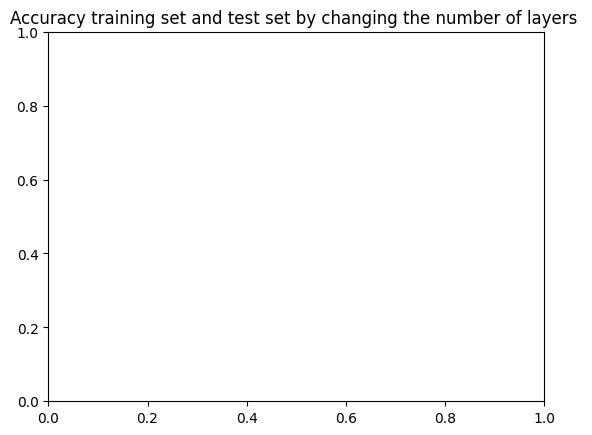

In [90]:
print(len(val_test))
print(len(val_k))
plt.title("Accuracy training set and test set by changing the number of layers ")
plt.plot(val_k, val_test,'o-', label='test set')
plt.plot(val_k,val_train,'o-', label='training set')
plt.xscale('log')
plt.xlabel('the number of layers ')
plt.ylabel('Accuracy  training set and test set')
plt.legend()
plt.show()

In [96]:
val_test_long=np.array([0.605 0.77  0.88  0.89  0.93  0.935 0.945 0.945 0.92  0.94  0.95  0.945
 0.95  0.945 0.945 0.94  0.95  0.945 0.945 0.945 0.945 0.94  0.945 0.94
 0.945 0.205 0.855 0.875 0.945 0.95  0.95  0.945 0.95  0.945 0.945 0.95
 0.945 0.95  0.955 0.945 0.945 0.94  0.95  0.945 0.945 0.95  0.945 0.945
 0.945 0.945 0.38  0.855 0.95  0.96  0.945 0.95  0.95  0.945 0.94  0.95
 0.95  0.93  0.95  0.945 0.94  0.935 0.945 0.94  0.94  0.95  0.94  0.935
 0.93  0.94  0.94  0.18  0.21  0.915 0.855 0.945 0.95  0.935 0.94  0.93
 0.935 0.94  0.945 0.94  0.935 0.935 0.935 0.935 0.945 0.945 0.935 0.925
 0.945 0.93  0.945 0.935 0.205 0.21  0.88  0.18  0.94  0.94  0.93  0.94
 0.94  0.945 0.94  0.94  0.94  0.935 0.94  0.935 0.945 0.92  0.94  0.945
 0.935 0.94  0.935 0.935 0.925 0.175 0.175 0.89  0.9   0.945 0.945 0.935
 0.945 0.95  0.935 0.935 0.945 0.935 0.935 0.93  0.94  0.955 0.94  0.94
 0.925 0.94  0.94  0.945 0.935 0.93  0.175 0.18  0.945 0.88  0.945 0.915
 0.945 0.93  0.935 0.93  0.94  0.945 0.945 0.945 0.945 0.94  0.93  0.94
 0.935 0.94  0.93  0.95  0.935 0.925 0.93  0.21  0.205 0.61  0.88  0.945
 0.925 0.935 0.945 0.935 0.945 0.935 0.94  0.925 0.94  0.94  0.94  0.94
 0.95  0.93  0.94  0.945 0.93  0.925 0.94  0.95  0.21  0.175 0.935 0.175
 0.935 0.93  0.95  0.94  0.94  0.945 0.935 0.935 0.945 0.935 0.935 0.935
 0.945 0.935 0.925 0.93  0.95  0.93  0.93  0.93  0.935 0.18  0.18  0.905
 0.405 0.93  0.92  0.925 0.93  0.92  0.935 0.91  0.93  0.945 0.945 0.925
 0.935 0.935 0.93  0.935 0.91  0.935 0.94  0.93  0.91  0.93  0.175 0.175
 0.89  0.175 0.935 0.94  0.925 0.86  0.93  0.81  0.94  0.93  0.905 0.94
 0.95  0.935 0.955 0.93  0.915 0.93  0.925 0.945 0.93  0.93  0.93  0.18
 0.18  0.83  0.405 0.6   0.9   0.935 0.91  0.93  0.87  0.935 0.95  0.93
 0.935 0.935 0.94  0.945 0.93  0.935 0.925 0.945 0.925 0.895 0.8   0.94
 0.18  0.21  0.18  0.6   0.81  0.915 0.915 0.935 0.945 0.93  0.9   0.94
 0.915 0.875 0.93  0.945 0.49  0.935 0.925 0.935 0.93  0.94  0.87  0.94
 0.94  0.21  0.18  0.18  0.945 0.935 0.83  0.92  0.935 0.935 0.895 0.935
 0.925 0.925 0.925 0.865 0.9   0.925 0.87  0.925 0.94  0.94  0.935 0.925
 0.935 0.935 0.21  0.23  0.18  0.405 0.82  0.94  0.92  0.93  0.585 0.91
 0.935 0.865 0.845 0.94  0.915 0.915 0.92  0.93  0.93  0.935 0.93  0.93
 0.92  0.92  0.92  0.175 0.175 0.175 0.88  0.175 0.9   0.915 0.925 0.945
 0.935 0.935 0.93  0.935 0.93  0.905 0.64  0.93  0.84  0.93  0.94  0.89
 0.945 0.935 0.945 0.925 0.205 0.175 0.175 0.175 0.18  0.405 0.925 0.93
 0.175 0.935 0.86  0.915 0.175 0.76  0.825 0.935 0.925 0.945 0.875 0.915
 0.935 0.845 0.945 0.94  0.875 0.18  0.205 0.175 0.205 0.205 0.175 0.79
 0.935 0.175 0.175 0.865 0.91  0.88  0.935 0.89  0.175 0.93  0.93  0.925
 0.175 0.94  0.94  0.925 0.935 0.93  0.175 0.18  0.18  0.175 0.21  0.18
 0.745 0.175 0.175 0.18  0.92  0.175 0.905 0.91  0.405 0.175 0.93  0.925
 0.175 0.35  0.915 0.94  0.925 0.92  0.18  0.18  0.175 0.205 0.18  0.175
 0.175 0.18  0.175 0.175 0.175 0.175 0.93  0.175 0.18  0.18  0.175 0.175
 0.625 0.92  0.18  0.76  0.175 0.175 0.935 0.175 0.205 0.175 0.21  0.175
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.405 0.18  0.69  0.175 0.175
 0.18  0.175 0.18  0.18  0.175 0.175 0.18  0.18  0.175 0.205 0.23  0.18
 0.175 0.175 0.21  0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.18  0.18
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.18  0.21  0.21
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.18  0.18  0.18  0.175 0.175
 0.175 0.18  0.18  0.175 0.175 0.18  0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.18  0.175 0.175 0.18  0.175 0.175 0.18  0.18  0.175 0.18
 0.175 0.175 0.175 0.175 0.18  0.175 0.175 0.175 0.175 0.175 0.175 0.18
 0.175 0.18  0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.18  0.18  0.175 0.175 0.175 0.175 0.175 0.175 0.18  0.175 0.175 0.175
 0.18 ])

SyntaxError: invalid syntax (2973725046.py, line 1)

val_nb_layer
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]
val_nb_neurones
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]
val_test
[0.605 0.77  0.88  0.89  0.93  0.935 0.945 0.945 0.92  0.94  0.95  0.945
 0.95  0.945 0.945 0.94  0.95  0.945 0.945 0.945 0.945 0.94  0.945 0.94
 0.945 0.205 0.855 0.875 0.945 0.95  0.95  0.945 0.95  0.945 0.945 0.95
 0.945 0.95  0.955 0.945 0.945 0.94  0.95  0.945 0.945 0.95  0.945 0.945
 0.945 0.945 0.38  0.855 0.95  0.96  0.945 0.95  0.95  0.945 0.94  0.95
 0.95  0.93  0.95  0.945 0.94  0.935 0.945 0.94  0.94  0.95  0.94  0.935
 0.93  0.94  0.94  0.18  0.21  0.915 0.855 0.945 0.95  0.935 0.94  0.93
 0.935 0.94  0.945 0.94  0.935 0.935 0.935 0.935 0.945 0.945 0.935 0.925
 0.945 0.93  0.945 0.935 0.205 0.21  0.88  0.18  0.94  0.94  0.93  0.94
 0.94  0.945 0.94  0.94  0.94  0.935 0.94  0.935 0.945 0.92  0.94  0.945
 0.935 0.94  0.935 0.935 0.925 0.175 0.175 0.89  0.9   0.945 0.945 0.935
 0.945 0

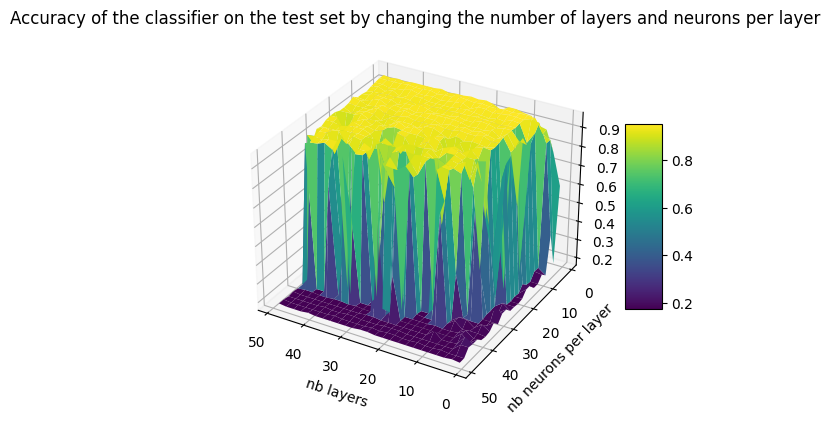

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


print("val_nb_layer")
print(val_nb_layer)
print("val_nb_neurones")
print(val_nb_neurones)
print("val_test")
print(val_test)

# Générer des données aléatoires pour les axes x, y et z
x = val_nb_layer
y = val_nb_neurones

z=np.array(val_test)
#z = np.array([val_test[i:i+5] for i in range(0, len(val_test), 5)])
#print(val_test)

# Créer une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Créer une grille pour x, y et z
x, y = np.meshgrid(val_nb_layer, val_nb_neurones)

# Tracer la surface
surface = ax.plot_surface(x, y, z.reshape(x.shape), cmap='viridis', edgecolor='none')

# Ajouter une barre de couleur
fig.colorbar(surface, shrink=0.5, aspect=5)

"""
# Créer une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(x, y, z)


# Tracer les points 3D avec une couleur variant en fonction de la valeur z
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
ax.scatter(x, y, z, c=colors)

# Ajouter une barre de couleur
mappable = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
mappable.set_array(z)
plt.colorbar(mappable)





# Tracer la surface avec des couleurs chaudes pour les valeurs élevées
surface = ax.plot_surface(x, y, z, cmap='hot', alpha=0.8)

# Ajouter une barre de couleur
fig.colorbar(surface, shrink=0.5, aspect=5)
"""

ax.invert_xaxis()
ax.invert_yaxis()
# Ajouter des labels d'axes
ax.set_xlabel('nb layers')
ax.set_ylabel('nb neurons per layer')
ax.set_zlabel('test set accuracy')
ax.set_title('Accuracy of the classifier on the test set by changing the number of layers and neurons per layer')
# Afficher le graphe
plt.show()


## Impact of parameters on the classifier

- relever l'accuracy sur training, test et le temps d'exécution pour differents paramètres 

# Training of the MLP for Pyrat

## 1) Training of the MLP on several games with the same settings (size = 5 * 7 and number of cheese = 4)

## a) Training with raw data directly imported from the file 

In [ ]:
# Load maze configuration and winners data from Lab1
cheeses_npz = np.load("cheeses_500_games_5x7_4.npz")
X = cheeses_npz["data"]
winners_npz = np.load("winners_500_games_5x7_4.npz")
Y = winners_npz["data"]


FileNotFoundError: [Errno 2] No such file or directory: 'cheeses_500_games_5x7_4.npz'

In [ ]:
# Split dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [ ]:
# creation of the classifier 
classifier = MLPClassifier(max_iter=1000)

# Training the classifier
classifier.fit(X_train, Y_train)

# Accuracy of the classifier on the training set
training_set_accuracy = classifier.score(X_train, Y_train)
print(f"Accuracy of the classifier on the training set: {classifier.score(X_train, Y_train)}")

# Accuracy of the classifier on the test set
test_set_accuracy = classifier.score(X_test, Y_test)
print(f"Accuracy of the classifier on the test set: {classifier.score(X_test, Y_test)}")

Accuracy of the classifier on the training set: 1.0
Accuracy of the classifier on the test set: 0.56


Here, the major problem is that we might want to predict the winner of a game with different number of cheese and a different grid dimensions. 

So, to overcome this issue, we will set a generic matrix size for the training of model and for the prediction as well. Here, the challenge will be to reshape the cheeses vectors without loosing informations.

Today, our study will concentrate on grid size from 2x2 to 40x40. 

Then the size of the matrices will be of 40x40.

## b) Training with a generic matrix shape of 40x40

In [ ]:
# transformation of the vectors into a matrix
new_shape = (500, 5, 7)
X = X.reshape(new_shape)

In [ ]:
def matrix_formating_v1(initial_matrix, new_number_of_lines, new_number_of_columns):
    initial_number_of_lines, initial_number_of_columns = initial_matrix.shape
    
    # Compute the number of zeros to add to the initial matrix
    pad_lines = max(0, new_number_of_lines - initial_number_of_lines)
    pad_columns = max(0, new_number_of_columns - initial_number_of_columns)
    
    # Calculate the space needed between new uper corner and old uper corner
    space_lines = pad_lines // 2
    space_columns = pad_columns // 2
    
    # Ajouter zeros around the initial matrix
    new_matrix = np.pad(initial_matrix, ((space_lines, pad_lines - space_lines),
                                                (space_columns, pad_columns - space_columns)),
                                                mode='constant')
    return new_matrix

def matrix_formating_v2(initial_matrix, new_number_of_lines, new_number_of_columns):
    initial_number_of_lines, initial_number_of_columns = initial_matrix.shape
    ratio_lines = new_number_of_lines / initial_number_of_lines
    ratio_columns = new_number_of_columns / initial_number_of_columns
    
    new_matrix = np.zeros((new_number_of_lines, new_number_of_columns), dtype=int)
    for i in range(new_number_of_lines):
        for j in range(new_number_of_columns):
            origine_i = int(i / ratio_lines)
            origine_j = int(j / ratio_columns)
            new_matrix[i][j] = initial_matrix[origine_i][origine_j]
    return new_matrix

def get_data_ready_to_be_predicted(file, nb_lines, nb_columns):
    X = file["cheeses"]
    Y = file["winners"]
    nb_games = file['cheeses'].shape[0]
    new_shape = (nb_games, nb_lines, nb_columns)
    X = np.array(X).reshape(new_shape)
    new_shape = (nb_games, 40, 40)
    X_formatted = np.zeros(new_shape, dtype=int)
    for i in range(nb_games):
        X_formatted[i] = matrix_formating_v1(X[i], 40, 40)
    flat_vector =  np.zeros((nb_games, 40*40), dtype=int)
    for i in range(nb_games):
        flat_vector[i] = X_formatted[i].reshape(-1)
    return flat_vector, Y

In [ ]:
# Definition of the new array size
formatted_size = (500, 40, 40)

# Creation of a null array that will be filled latter
X_formatted = np.zeros(formatted_size, dtype=int)

# Going through all matrices in the initial array
for i in range(500):
    X_formatted[i] = matrix_formating_v1(X[i], 40, 40)

# definition of a flat array because the learning usueally takes vectors instead of matrices
flat_vector = np.zeros((500, 40*40), dtype=int)

# Filling every vector with the flatten matrix reshaped
for i in range(500):
    flat_vector[i] = X_formatted[i].reshape(-1)


In [ ]:
# Split dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(flat_vector, Y, test_size=0.2, random_state=0)

In [ ]:
# creation of the classifier 
classifier = MLPClassifier(max_iter=1000)

# Training the classifier
classifier.fit(X_train, Y_train)

# Accuracy of the classifier on the training set
training_set_accuracy = classifier.score(X_train, Y_train)
print(f"Accuracy of the classifier on the training set: {classifier.score(X_train, Y_train)}")

# Accuracy of the classifier on the test set
test_set_accuracy = classifier.score(X_test, Y_test)
print(f"Accuracy of the classifier on the test set: {classifier.score(X_test, Y_test)}")

Accuracy of the classifier on the training set: 1.0
Accuracy of the classifier on the test set: 0.56


The good new is that this version of the classifier is able to predict the test values with the same accuracy as the non formatted version. This tells us that the formatting of matrix is not that bad.

## c) Some predictions

Once this is done, we would like to use the model to predict some winners for : 
- the same game configuration 
- the same game configuration but with different numbers of cheese
- the same game configuration but with different heights
- the same game configuration but with different widths
- a completely different game configuration

Let's keep in mind that the games are running with two greedy algorithms.

### i) prediction with the same configuration

In [ ]:
# Variable definitions 
same_configuration_accuracy = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/NORMAL/"
file_path = f"{dataset_folder}/normal.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    same_configuration_accuracy = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier on the same configuration: {same_configuration_accuracy}")


Accuracy of the classifier on the same configuration: 0.92


### ii) prediction with the same configuration but with different numbers of cheese

In [ ]:
# Variable definitions 
cheese_accuracy_1 = 0
cheese_accuracy_8 = 0
cheese_accuracy_15= 0
cheese_accuracy_22= 0
cheese_accuracy_30= 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_CHEESE/"

# 1 cheese
file_path = f"{dataset_folder}/1_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_1 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_1}")

# 8 cheese 
file_path = f"{dataset_folder}/8_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_8 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_8}")

# 15 cheese 
file_path = f"{dataset_folder}/15_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_15 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_15}")

# 22 cheese 
file_path = f"{dataset_folder}/22_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_22 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_22}")

# 30 cheese 
file_path = f"{dataset_folder}/30_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_30 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_30}")


Accuracy of the classifier: 0.78
Accuracy of the classifier: 0.52
Accuracy of the classifier: 0.26
Accuracy of the classifier: 0.44
Accuracy of the classifier: 0.56


### iii) prediction with the same configuration but with different heights

In [ ]:
# Variable definitions 
height_accuracy_2 = 0
height_accuracy_11 = 0
height_accuracy_21 = 0
height_accuracy_30 = 0
height_accuracy_40 = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_HEIGHT/"

# 2 height
file_path = f"{dataset_folder}/2_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,2)
    height_accuracy_2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_2}")

# 11 height
file_path = f"{dataset_folder}/11_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,11)
    height_accuracy_11 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_11}")

# 21 height
file_path = f"{dataset_folder}/21_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,21)
    height_accuracy_21 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_21}")

# 30 height
file_path = f"{dataset_folder}/30_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,30)
    height_accuracy_30 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_30}")

# 40 height
file_path = f"{dataset_folder}/40_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,40)
    height_accuracy_40 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_40}")


Accuracy of the classifier: 0.34
Accuracy of the classifier: 0.38
Accuracy of the classifier: 0.32
Accuracy of the classifier: 0.5
Accuracy of the classifier: 0.42


### iiii) prediction with the same configuration but with different widths

In [ ]:
# Variable definitions 
width_accuracy_2 = 0
width_accuracy_11 = 0
width_accuracy_21 = 0
width_accuracy_30 = 0
width_accuracy_40 = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_WIDTH/"

# 2 width
file_path = f"{dataset_folder}/2_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 2,7)
    width_accuracy_2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_2}")

# 11 width
file_path = f"{dataset_folder}/11_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 11,7)
    width_accuracy_11 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_11}")

# 21 width
file_path = f"{dataset_folder}/21_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 21,7)
    width_accuracy_21 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_21}")

# 30 width
file_path = f"{dataset_folder}/30_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 30,7)
    width_accuracy_30 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_30}")

# 40 width
file_path = f"{dataset_folder}/40_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 40,7)
    width_accuracy_40 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_40}")


Accuracy of the classifier: 0.34
Accuracy of the classifier: 0.44
Accuracy of the classifier: 0.4
Accuracy of the classifier: 0.42
Accuracy of the classifier: 0.36


### iiiii) prediction with a completely different game configuration

In [ ]:
import re

# Variable definitions 
random_accuracy = 0
X_concat = []
Y_concat = []

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/RANDOM/"
files = os.listdir(dataset_folder)
for filename in files:
    match = re.match(r'.*_(\d+)x(\d+)\.npz', filename)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
    file = np.load(f"{dataset_folder}/{filename}")
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, width,height)
    for vector, y in zip(X_formatted, Y_formatted):
        X_concat.append(vector)
        Y_concat.append(y)
random_accuracy = classifier.score(X_concat, Y_concat)
print(f"Accuracy of the classifier: {random_accuracy}")



Accuracy of the classifier: 0.25333333333333335


## d) conclusion 

To conclude, let's plot some charts 

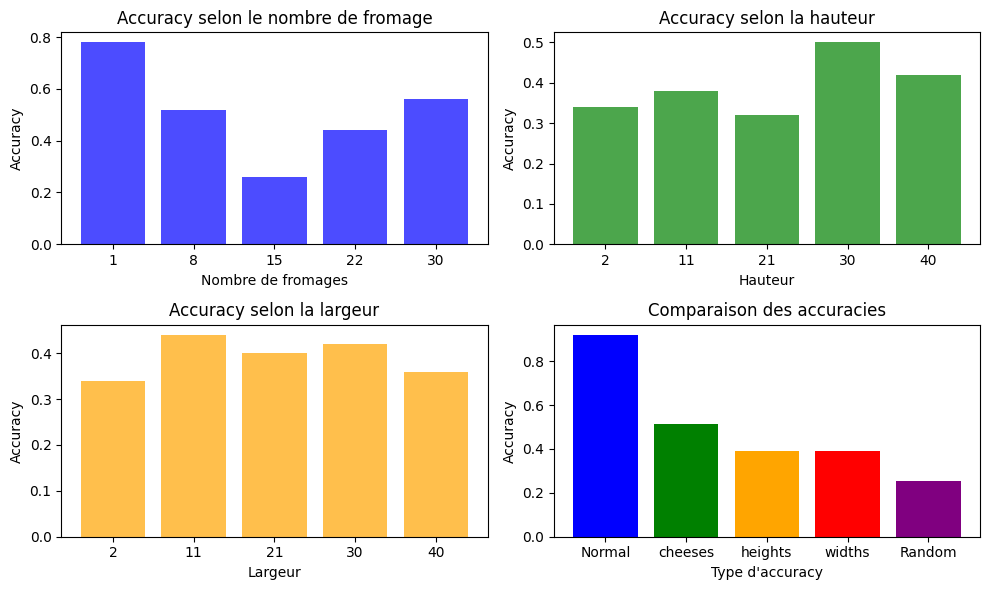

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données d'exemple
cheese_accuracy_data = [cheese_accuracy_1, cheese_accuracy_8, cheese_accuracy_15, cheese_accuracy_22, cheese_accuracy_30]
height_accuracy_data = [height_accuracy_2, height_accuracy_11, height_accuracy_21, height_accuracy_30, height_accuracy_40]
width_accuracy_data = [width_accuracy_2, width_accuracy_11, width_accuracy_21, width_accuracy_30, width_accuracy_40]
normal_accuracy = same_configuration_accuracy
random_accuracy = random_accuracy

# Tracer les barres
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(range(len(cheese_accuracy_data)), cheese_accuracy_data, color='blue', alpha=0.7)
plt.xticks(range(len(cheese_accuracy_data)), ['1', '8', '15', '22', '30'])
plt.title('Accuracy selon le nombre de fromage')
plt.xlabel('Nombre de fromages')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(range(len(height_accuracy_data)), height_accuracy_data, color='green', alpha=0.7)
plt.xticks(range(len(height_accuracy_data)), ['2', '11', '21', '30', '40'])
plt.title('Accuracy selon la hauteur')
plt.xlabel('Hauteur')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 3)
plt.bar(range(len(width_accuracy_data)), width_accuracy_data, color='orange', alpha=0.7)
plt.xticks(range(len(width_accuracy_data)), ['2', '11', '21', '30', '40'])
plt.title('Accuracy selon la largeur')
plt.xlabel('Largeur')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 4)
plt.bar(['Normal', 'cheeses', 'heights', 'widths', 'Random'],
        [normal_accuracy, np.mean(cheese_accuracy_data), np.mean(height_accuracy_data), np.mean(width_accuracy_data), random_accuracy],
        color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Comparaison des accuracies')
plt.xlabel('Type d\'accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


# 2) Training of the MLP on several games with different number of cheese, height and width to improve the generalization

This time we will train the MLP with a lot of 117 files representing for each one of them a 100 games with all different configurationsregarding the number of cheese, the height and the width. 

Our bet is that it might have less accuracy on the test set but it will predict with a better accuracy the winners of random configurations games

## a) Training of the classifier 

In [ ]:
X_concat = []
Y_concat = []
dataset_folder = "../../DATASETS_SAILLY_GREGORY/"
nb_games = 100
nb_cheeses = np.linspace(1, 40, 5).astype(int)
maze_widths = np.linspace(2, 40, 5).astype(int) 
maze_heights = np.linspace(2, 40, 5).astype(int) 
for nb_cheese in nb_cheeses:
    for maze_width in maze_widths:
        for maze_height in maze_heights:
            file_path = f"{dataset_folder}/{int(nb_games)}_games_{int(nb_cheese)}_cheeses_{int(maze_width)}x{int(maze_height)}.npz"
            if os.path.exists(file_path):
                file = np.load(file_path)     
                X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, maze_width,maze_height)
                for vector, y in zip(X_formatted, Y_formatted):
                    X_concat.append(vector)
                    Y_concat.append(y)


Once all the files have been concatenated, we can prepare the train and test set : 

In [ ]:
# Split dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_concat, Y_concat, test_size=0.2, random_state=0)

Now we can train the model with the same parameters than the previous one just to compare them : 

In [ ]:
# creation of the classifier 
classifier = MLPClassifier(max_iter=500)

# Training the classifier
classifier.fit(X_train, Y_train)

# Accuracy of the classifier on the training set
training_set_accuracy = classifier.score(X_train, Y_train)
print(f"Accuracy of the classifier on the training set: {classifier.score(X_train, Y_train)}")

# Accuracy of the classifier on the test set
test_set_accuracy = classifier.score(X_test, Y_test)
print(f"Accuracy of the classifier on the test set: {classifier.score(X_test, Y_test)}")

Accuracy of the classifier on the training set: 0.9446581196581196
Accuracy of the classifier on the test set: 0.5329059829059829


## b) Some predictions

## c) Conclusion

# 3) Changing MLP parameters for pyrat 

- train the data on several parameters and conclude on which one is the best to generalize with a good accuracy 

In [ ]:
new_shape = (10, 10, 7)
cheeses = np.array(cheeses).reshape(new_shape)
new_shape_agrandie = (10, 40, 40)
X_formatted = np.zeros(new_shape_agrandie, dtype=int)
print(cheeses.shape)
for i in range(10):
    X_formatted[i] = matrix_formating_v1(cheeses[i], 40, 40)

flat_vector = np.zeros((10, 40*40), dtype=int)
for i in range(10):
    flat_vector[i] = X_formatted[i].reshape(-1)

predicted_results = classifier.predict(flat_vector)
print(winners)
print(predicted_results)
print(f"accuracy of the prediction for 10 games with different parameters in the maze: {np.mean(predicted_results == winners)}")

(10, 10, 7)
[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0]
[-1. -1.  0. -1.  1.  0.  0.  0.  0.  0.]
accuracy of the prediction for 10 games with different parameters in the maze: 0.3


In [ ]:
import sys     # These lines correct a bug occuring in Notebooks.
sys.argv=['']  # It's not perfect, but it works.

import os
lab_commons_path = os.path.join(os.getcwd(), "..", "..")
if lab_commons_path not in sys.path:
    sys.path.append(lab_commons_path)

import lab_commons.make_2_player_matches as simulations
import lab_commons.AI.greedy as greedy_player
import lab_commons.AI.random as random_player
import lab_commons.AI.second_greedy as second_greedy_player

program_1 = greedy_player 
program_2 = second_greedy_player # You may want to test with the random player.


nb_games = 10

nb_cheese = 25
maze_width = 10
maze_height = 7

_, cheeses, winners = simulations.run_several_games(program_1, program_2, nb_cheese = nb_cheese,
                                                                  maze_width = maze_width, maze_height = maze_height, 
                                                                  nb_games = nb_games)

Game:   0%|          | 0/10 [00:00<?, ?it/s]

Game:  90%|█████████ | 9/10 [00:46<00:04,  4.81s/it]

In [ ]:
new_shape = (10, 10, 7)
cheeses = np.array(cheeses).reshape(new_shape)
new_shape_agrandie = (10, 40, 40)
X_formatted = np.zeros(new_shape_agrandie, dtype=int)
print(cheeses.shape)
for i in range(10):
    X_formatted[i] = matrix_formating_v1(cheeses[i], 40, 40)

flat_vector = np.zeros((10, 40*40), dtype=int)
for i in range(10):
    flat_vector[i] = X_formatted[i].reshape(-1)

predicted_results = classifier.predict(flat_vector)
print(winners)
print(predicted_results)
print(f"accuracy of the prediction for 10 games with different parameters in the maze: {np.mean(predicted_results == winners)}")

(10, 10, 7)
[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0]
[-1. -1.  0. -1.  0.  0. -1.  0.  0.  1.]
accuracy of the prediction for 10 games with different parameters in the maze: 0.3


In [ ]:
import os
import numpy as np

X_concat = []
Y_concat = []
dataset_folder = "../../../DATASETS_SAILLY_GREGORY/"
nb_games = 100
nb_cheeses = np.linspace(1, 40, 5).astype(int)
maze_widths = np.linspace(2, 40, 5).astype(int)  # Convertir en entiers
maze_heights = np.linspace(2, 40, 5).astype(int)  # Convertir en entiers
for nb_cheese in nb_cheeses:
    for maze_width in maze_widths:
        for maze_height in maze_heights:
            file_path = f"{dataset_folder}/{int(nb_games)}_games_{int(nb_cheese)}_cheeses_{int(maze_width)}x{int(maze_height)}.npz"
            if os.path.exists(file_path):
                file = np.load(file_path)
                X = file["cheeses"]
                Y = file["winners"]
                new_shape = (nb_games, maze_width, maze_height)
                X = X.reshape(new_shape)
                new_shape_agrandie = (nb_games, 40, 40)
                X_formatted = np.zeros(new_shape_agrandie, dtype=int)
                for i in range(nb_games):
                    X_formatted[i] = matrix_formating_v1(X[i], 40, 40)

                flat_vector = np.zeros((nb_games, 40*40), dtype=int)
                for i in range(nb_games):
                    flat_vector[i] = X_formatted[i].reshape(-1)
                for vector, y in zip(flat_vector, Y):
                    X_concat.append(vector)
                    Y_concat.append(y)

print(len(X_concat))
print(len(Y_concat))


11700
11700


In [ ]:
print(type(flat_vector))
X_train, X_test, Y_train, Y_test = train_test_split(X_concat, Y_concat, test_size=0.2, random_state=0)

# creation of the classifier 
classifier = MLPClassifier(max_iter=3000)

# Training the classifier
classifier.fit(X_train, Y_train)

# Accuracy of the classifier on the training set
training_set_accuracy = classifier.score(X_train, Y_train)
print(f"Accuracy of the classifier on the training set: {classifier.score(X_train, Y_train)}")

# Accuracy of the classifier on the test set
test_set_accuracy = classifier.score(X_test, Y_test)
print(f"Accuracy of the classifier on the test set: {classifier.score(X_test, Y_test)}")



<class 'numpy.ndarray'>


Accuracy of the classifier on the training set: 0.9441239316239316
Accuracy of the classifier on the test set: 0.5316239316239316


In [ ]:
import sys     # These lines correct a bug occuring in Notebooks.
sys.argv=['']  # It's not perfect, but it works.

import os
lab_commons_path = os.path.join(os.getcwd(), "..", "..")
if lab_commons_path not in sys.path:
    sys.path.append(lab_commons_path)

import lab_commons.make_2_player_matches as simulations
import lab_commons.AI.greedy as greedy_player
import lab_commons.AI.random as random_player
import lab_commons.AI.second_greedy as second_greedy_player

program_1 = greedy_player 
program_2 = second_greedy_player # You may want to test with the random player.


nb_games = 10

nb_cheese = 25
maze_width = 10
maze_height = 7

_, cheeses, winners = simulations.run_several_games(program_1, program_2, nb_cheese = nb_cheese,
                                                                  maze_width = maze_width, maze_height = maze_height, 
                                                                  nb_games = nb_games)

In [ ]:
new_shape = (10, 10, 7)
cheeses = np.array(cheeses).reshape(new_shape)
new_shape_agrandie = (10, 40, 40)
X_formatted = np.zeros(new_shape_agrandie, dtype=int)
print(cheeses.shape)
for i in range(10):
    X_formatted[i] = matrix_formating_v1(cheeses[i], 40, 40)

flat_vector = np.zeros((10, 40*40), dtype=int)
for i in range(10):
    flat_vector[i] = X_formatted[i].reshape(-1)

predicted_results = classifier.predict(flat_vector)
print(winners)
print(predicted_results)
print(f"accuracy of the prediction for 10 games with different parameters in the maze: {np.mean(predicted_results == winners)}")

(10, 10, 7)
[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0]
[-1. -1.  0.  1.  1. -1. -1.  1. -1. -1.]
accuracy of the prediction for 10 games with different parameters in the maze: 0.3


In [ ]:
import numpy as np

import numpy as np

def matrix_formating_v2(initial_matrix, new_number_of_lines, new_number_of_columns):
    initial_number_of_lines, initial_number_of_columns = initial_matrix.shape
    
    # Calculer le nombre de zéros à ajouter autour de la matrice d'origine
    pad_lignes = max(0, new_number_of_lines - initial_number_of_lines)
    pad_colonnes = max(0, new_number_of_columns - initial_number_of_columns)
    
    # Calculer les décalages pour la position du coin supérieur gauche de la matrice d'origine
    decalage_lignes = pad_lignes // 2
    decalage_colonnes = pad_colonnes // 2
    
    # Ajouter les zéros autour de la matrice d'origine
    matrice_agrandie = np.pad(initial_matrix, ((decalage_lignes, pad_lignes - decalage_lignes),
                                                (decalage_colonnes, pad_colonnes - decalage_colonnes)),
                                                mode='constant')
    
    return matrice_agrandie

# Matrice d'origine
initial_matrix = np.array([[1, 0, 0],
                             [0, 1, 1],
                             [0, 0, 1]])

# Dimensions de la nouvelle matrice
new_number_of_lines = 11
new_number_of_columns = 11

# Agrandir la matrice
nouvelle_matrice = matrix_formating_v2(initial_matrix, new_number_of_lines, new_number_of_columns)
print(nouvelle_matrice)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


## Utilisation et variation des paramètres du MLP

# Entrainement d'un MLP pour Pyrat

In [ ]:
file_path = "../../../DATASETS_SAILLY_GREGORY/100_games_10_cheeses_2x11.npz"
data = np.load(file_path)
np.set_printoptions(threshold=np.inf)
print(data.files)
print(data['cheeses'])
print(data['winners'])

file_path = "../../../DATASETS_SAILLY_GREGORY/100_games_1_cheeses_2x2.npz"
data = np.load(file_path)
np.set_printoptions(threshold=np.inf)
print(data.files)
print(data['cheeses'])
print(data['winners'])


['cheeses', 'winners']
[[0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 

- Entrainer le MLP pour un jeu de données (celui des profs)
- Tenter de prédire le winner pour une configuration initiale (grille de la même taille que les données entrainées)
- Tenter de prédire le winner pour des configuration initiales de plusieurs games de plusieurs dimensions et de plusieurs fromages et logiquement ça sera moins bon (afficher avec des plots )
- A présent, entrainer le MLP pour un jeu de données comprenant des données de plusieurs tailles de grilles et de nombre de fromages (resize les vecteurs)
- Tenter de prédire le winner pour une configuration initiale dont la grille est de la même tailler et même nombre de fromage que le fichier des profs
- Tenter de prédire le winner pour des configuration initiales de plusieurs games de plusieurs dimensions et de plusieurs fromages et logiquement ça sera meilleur qu'avant
- Recommencer en essayant de perfectionner le modèle en testant différents paramètres à définir. 

In [ ]:
# j'ai ce code : # Group 10 : Topic 3 MULTI LAYER PERCEPTRON (MLP)
# ### Necessary imports
# import tqdm
# import numpy as np
# import ast
# import os
# import sys
# import matplotlib.pyplot as plt
# ## a) Definition of the method
# ## b) Simple example 
# To explain how the MLP works, we will use a simple example using blobs from the sklearn dataset.

# First, let's import the right package from sklearn datasets
# from sklearn.datasets import make_blobs
# Now, let's generate blobs as we did in the Lab 2 : 
# x, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
# print(x)
# print(y)
# print(f"the shape of x is {x.shape}")
# print(f"the shape of y is {y.shape}")
# Here, we generated 1000 samples of data (2D) and grouped them into 3 groups. 

# Now, let's plot the data according to the cluster they are assigned to.
# %matplotlib inline
# plt.scatter(x[:,0], x[:,1], c = y)
# plt.xlabel("x-axis")
# plt.ylabel("y-axis")
# plt.title("Blobs")
# plt.show()
# Now let's train this blobs with the MLP so that it learns how to predict the cluster a data point belongs to.

# First, let's import the necessary functions needed to split the data into a training set and a test set.
# from sklearn.model_selection import train_test_split
# Now, let's divide the data into a training set and a test set : 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Here, the training set represents 80% of the data while the test set represents 20% of the data.
# ### Use of the Multi Layer Perceptron to classify this dataset

# from sklearn.neural_network import MLPClassifier

# # creation of the classifier 
# classifier = MLPClassifier(random_state = 0, max_iter=300)

# # Training the classifier
# classifier.fit(x_train, y_train)

# # Accuracy of the classifier on the training set
# training_set_accuracy = classifier.score(x_train, y_train)
# print(f"Accuracy of the classifier on the training set: {classifier.score(x_train, y_train)}")

# # Accuracy of the classifier on the test set
# test_set_accuracy = classifier.score(x_test, y_test)
# print(f"Accuracy of the classifier on the test set: {classifier.score(x_test, y_test)}")

In [ ]:
# import numpy as np
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Charger les données à partir des fichiers
# # Assumez que data_X contient les configurations de grille et data_Y contient les vainqueurs correspondants

# # Prétraitement des données
# X = []  # Contiendra les configurations de grille aplaties
# Y = []  # Contiendra les vainqueurs correspondants

# for grid_config, winner in zip(data_X, data_Y):
#     flattened_grid = np.ravel(grid_config)  # Aplatir la matrice de configuration de la grille
#     X.append(flattened_grid)
#     Y.append(winner)

# X = np.array(X)
# Y = np.array(Y)

# # Création des ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Entraînement du MLP Classifier
# classifier = MLPClassifier(random_state=42, max_iter=500)  # Vous pouvez ajuster les hyperparamètres selon vos besoins
# classifier.fit(X_train, y_train)

# # Évaluation du modèle
# y_pred = classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Prédiction sur de nouvelles données
# new_grid_config = ...  # Insérez ici la nouvelle configuration de grille à prédire
# flattened_new_grid = np.ravel(new_grid_config)
# predicted_winner = classifier.predict([flattened_new_grid])
# print("Predicted winner:", predicted_winner)


j'ai un jeu ou il y a deux jours, et le but est de recuperer plus de formage que l'autre joueurs. il peut y avoir differents nombres de fromages, différentes taille de grilles. les données à disposition sont des fichiers de plusieurs parties chacuns et comportent une liste de matrices représentant la configuration de la grille avec la repartition des formagfes et la liste des vainqueurs (python draw ou rat). les fichiers différent du fait qu'ils contiennent respectivement 100 parties pour une configuration spécifique de nombre de fromages, de hauteur et de largeur. l'idée est d'entrainer un MLP classifier pour que lorsqu'en entrée est donnée une matrice de disposition de formage, le classifier puisse prédire le vainqueur quelque soit la taille de la grille ou le nombre de formage 

You can use other arguments from make_blobs in order to change the variance of the blobs, or the coordinates of their center. You can also experiment on higher dimension, although it becomes difficult to visualize. 

sklearn has many other data generators, as well as ways to load standard datasets of various sizes. Check them out here: 

http://scikit-learn.org/stable/datasets


Now that we have generated a simple dataset, let's try to do a basic supervised learning approach. 

First, in order to mesure the ability of the model to generalize, we have to split the dataset into a training set and a test set. The test set is the part of the dataset that the model will not see during the training and will be used as a proxy for your "real world" examples.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*u03UsvBGwkYD4E7BObpcaw.png"></center>
<center><small>Image taken from https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8</small></center>

In sklearn, you can use the train_test_split function to split datasets.

Try to split the dataset you previously generated (the blobs) into x_train, x_test, y_train, y_test, with 80% in x_train and 20% in x_test. Set random_state = 0 so that the function always returns the same split.

In [ ]:
#### CELL TO BE COMPLETED 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


TypeError: Singleton array -1.0 cannot be considered a valid collection.

Check the shapes of the generated vectors.

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

Let's use a K-Nearest Neighbor classifier to test whether we can classify this dataset. Create a <b>classifier</b>, train it using your <b> training set </b> and evaluate it by its <b>accuracy</b> on both <b>the train and test sets</b>. 

In K-Nearest Neighbor classification (also known as KNN), when you want to predict the class of an object, you look at the K (an hyperparameter) nearest examples from the training (using a distance metric, in our case the euclidean distance). This object is then classified by a majority vote among its neighbors. In other words, the class of the object is the most common class among its neighbours.

To use a Nearest Neighbor with sklearn, you have to use the class [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

The sklearn API is consistent. This means that for almost every method they propose you can train it using [object.fit](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit), you can use it to make prediction with [object.predict](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) and finally verify the <b>accuracy</b> of the method using [object.score](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score).

In [ ]:
### CELL TO BE COMPLETED - Train the classifier and get the accuracy in both sets.
from sklearn.neighbors import KNeighborsClassifier
k = 1
classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)

#training of the classifier 
classifier.fit(x_train, y_train) 

#accuracy of the training set 
training_accuracy = classifier.score(x_train, y_train)
print("Train accuracy : ", training_accuracy)
#accuracy of the test set
test_accuracy = classifier.score(x_test, y_test)
print("Test accuracy : ", test_accuracy)

Train accuracy :  1.0
Test accuracy :  0.9265


Your classifier should have a train accuracy of 1, while the test accuracy should be high but not perfect.

This is caused by the bias-variance trade-off. The 1-NN classifier always has a bias of 0 (it perfectly classifies the training set) but it has a high variance given that having one more example in the training set can completely change a decision.

Try to avoid having such a high variance, test different values of k and plot the accuracies given the different values of the hyperparameter k. 

If you have time, we advise you to do the same analysis but varying the train/test split size.

Current k: 2, Current split size: 0.1
Current k: 27, Current split size: 0.1
Current k: 53, Current split size: 0.1
Current k: 78, Current split size: 0.1
Current k: 104, Current split size: 0.1
Current k: 129, Current split size: 0.1
Current k: 155, Current split size: 0.1
Current k: 181, Current split size: 0.1
Current k: 206, Current split size: 0.1
Current k: 232, Current split size: 0.1
Current k: 257, Current split size: 0.1
Current k: 283, Current split size: 0.1
Current k: 309, Current split size: 0.1
Current k: 334, Current split size: 0.1
Current k: 360, Current split size: 0.1
Current k: 385, Current split size: 0.1
Current k: 411, Current split size: 0.1
Current k: 437, Current split size: 0.1
Current k: 462, Current split size: 0.1
Current k: 488, Current split size: 0.1
Current k: 513, Current split size: 0.1
Current k: 539, Current split size: 0.1
Current k: 564, Current split size: 0.1
Current k: 590, Current split size: 0.1
Current k: 616, Current split size: 0.1
Curre

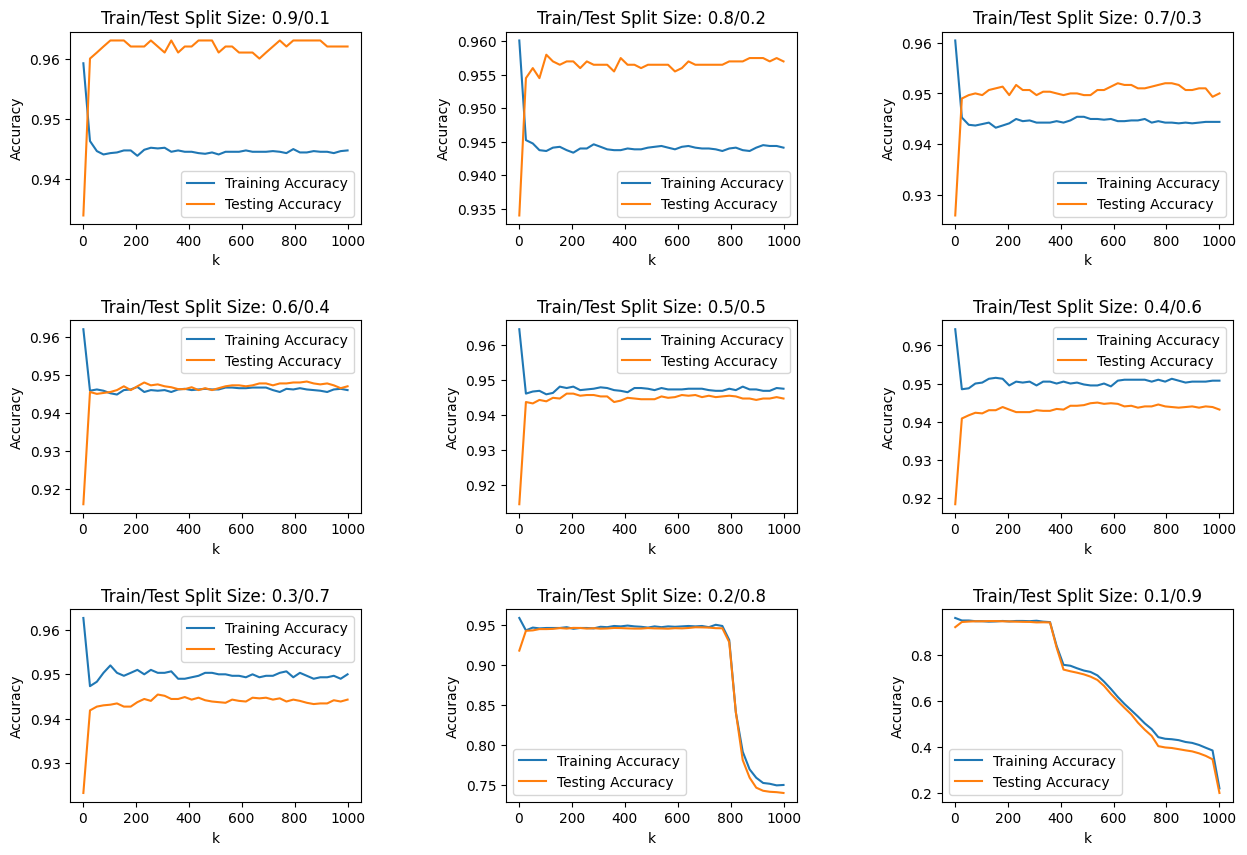

In [ ]:
# CELL TO BE COMPLETED - Train networks with varying k.
# train_acc_p = list()
# test_acc_p = list()  # list storing the test set accuracies
# test_ks = range(1,25)  # list containing values of k to be tested

# List to store training accuracies for each value of k and train/test split size
train_acc_p = []

# List to store testing accuracies for each value of k and train/test split size
test_acc_p = []

# List containing values of k to be tested
test_ks = np.linspace(2, 1000, 40, dtype=int)

# List containing train/test split sizes to be tested
split_sizes = np.linspace(0.1, 0.9, 9)

# Dictionary to store average/dif/bias/variance accuracies for each combination of k and train/test size
avg_acc = {}
dif_acc = {}
bias = {}
variance = {}

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate over train/test split sizes
for i, split_size in enumerate(split_sizes):
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=0)

    # Train networks with varying k
    for k in test_ks:

        print (f"Current k: {k}, Current split size: {split_size:.1f}")
        # Create classifier
        classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)

        # Train classifier
        classifier.fit(x_train, y_train)

        # Calculate training accuracy
        train_acc = classifier.score(x_train, y_train)
        train_acc_p.append(train_acc)

        # Calculate testing accuracy
        test_acc = classifier.score(x_test, y_test)
        test_acc_p.append(test_acc)
        
        # Calculate average accuracy for this combination of k and train/test size
        avg_acc[(k, split_size)] = np.mean([train_acc, test_acc])
        # Calculate difference between training and testing accuracy for this combination of k and train/test size
        dif_acc[(k, split_size)] = abs(train_acc - test_acc)
        # Calculate bias for this combination of k and train/test size
        bias[(k, split_size)] = train_acc - np.mean([train_acc, test_acc])
        # Calculate variance for this combination of k and train/test size
        variance[(k, split_size)] = np.mean([(train_acc - np.mean([train_acc, test_acc]))**2, (test_acc - np.mean([train_acc, test_acc]))**2])


    # Plot accuracies for each value of k
    axs[i // 3, i % 3].plot(test_ks, train_acc_p, label='Training Accuracy')
    axs[i // 3, i % 3].plot(test_ks, test_acc_p, label='Testing Accuracy')
    axs[i // 3, i % 3].set_title(f'Train/Test Split Size: {1 - split_size:.1f}/{split_size:.1f}')
    axs[i // 3, i % 3].set_xlabel('k')
    axs[i // 3, i % 3].set_ylabel('Accuracy')
    axs[i // 3, i % 3].legend()

    # Reset lists for next train/test split size
    train_acc_p = []
    test_acc_p = []

# Sort the dictionary by average accuracy in descending order
sorted_avg_acc = sorted(avg_acc.items(), key=lambda x: x[1], reverse=True)

# Sort the dictionary by difference accuracy in ascending order
sorted_dif_acc = sorted(dif_acc.items(), key=lambda x: x[1], reverse=False)

# Sort the dictionary by bias in ascending order
sorted_bias = sorted(bias.items(), key=lambda x: x[1], reverse=False)

# Sort the dictionary by variance in ascending order
sorted_variance = sorted(variance.items(), key=lambda x: x[1], reverse=False)

# Print the top 10 combinations of k and train/test size with the highest average accuracy
print("Top 10 combinations of k and train/test size with the highest average accuracy:")
for i in range(10):
    print(f"{sorted_avg_acc[i][0]}: {sorted_avg_acc[i][1]:.4f}")

# Print the top 10 combinations of k and train/test size with the lowest difference between training and testing accuracy
print("\nTop 10 combinations of k and train/test size with the lowest difference between training and testing accuracy:")
for i in range(10):
    print(f"{sorted_dif_acc[i][0]}: {sorted_dif_acc[i][1]:.4f}")

# Print the top 10 combinations of k and train/test size with the lowest bias
print("\nTop 10 combinations of k and train/test size with the lowest bias:")
for i in range(10):
    print(f"{sorted_bias[i][0]}: {sorted_bias[i][1]:.4f}")

# Print the top 10 combinations of k and train/test size with the lowest variance
print("\nTop 10 combinations of k and train/test size with the lowest variance:")
for i in range(10):
    print(f"{sorted_variance[i][0]}: {sorted_variance[i][1]:.4f}")
    

# Show plot
plt.show()


Once your classifier is trained, and bias-variance analysed, it is time to look at other metrics based on your results. It is important to remember that accuracy is a key metric, but it is not the <b> only </b> metric you should be focusing on.

Print a [classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) and a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for both training and test sets.

In the classification report, you are going to see 3 new metrics. They are really important because the accuracy does not show a complete portrait of your results.

* Precision: Percentage of correctly classified examples with respect to all retrieved examples
* Recall: Percentage of correctly classified examples with respect to all examples belonging to a given class
* F1 Score: Harmonic mean from precision and recall.

In [ ]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.

from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

# Choose the value of k
k = 5

# Train the classifier
classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
classifier.fit(x_train, y_train)

# Predict the training and testing set labels
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

# Generate the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_train_pred))

# Generate the confusion matrix for the training set
print("Confusion matrix for training set:")
print(confusion_matrix(y_train, y_train_pred))

# Generate the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_test_pred))

# Generate the confusion matrix for the testing set
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, y_test_pred))


Classification report for training set:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       184
           1       0.96      0.96      0.96       216
           2       0.92      0.91      0.92       196
           3       0.99      0.98      0.98       218
           4       1.00      1.00      1.00       186

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Confusion matrix for training set:
[[167   4  12   1   0]
 [  8 207   1   0   0]
 [ 11   5 179   1   0]
 [  3   0   2 213   0]
 [  0   0   0   0 186]]
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1816
           1       0.96      0.94      0.95      1784
           2       0.89      0.91      0.90      1804
           3       0.98      0.97      0.98      1782
          

Finally, you are going to plot the decision boundaries of our model. Use the function plot_boundaries given below. You can only do this if the tensor representing your data is two dimensional.

This function will test our model with values ranging from the smallest x to the highest x and from the lowest y to the highest y, each varying by $h$ and plot it nicely. [Link to the original implementation.](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

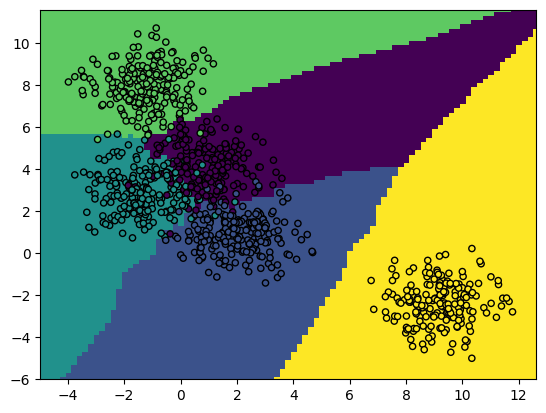

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

Predicting the winner in PyRat based on the initial cheese configuration
--

Use the code from lab1 in order to generate a PyRat dataset (X,y) of initial cheese configuration X each corresponding to a label of winner in y. 

The goal of the next part is to perform supervised learning on this dataset using a KNN classifier, as done above. Use the same metrics to estimate the performance of the classifier. 

We suggest that you start with a rather small maze, as the problem gets really high to solve in high dimensions.


In [ ]:
import sys     # These lines correct a bug occuring in Notebooks.
sys.argv=['']  # It's not perfect, but it works.

import os
lab_commons_path = os.path.join(os.getcwd(), "..", "..")
if lab_commons_path not in sys.path:
    sys.path.append(lab_commons_path)

import lab_commons.make_2_player_matches as simulations
import lab_commons.AI.greedy as greedy_player
import lab_commons.AI.random as random_player
import lab_commons.AI.second_greedy as second_greedy_player

program_1 = greedy_player 
program_2 = second_greedy_player # You may want to test with the random player.

As for Lab1, you can run several games with the following function, by specifying the number of desired games with `nb_games` and the maze dimensions and number of cheeses

In [ ]:
nb_games = 10

nb_cheese = 4
maze_width = 5
maze_height = 7

_, cheeses_10_games, winners_10_games = simulations.run_several_games(program_1, program_2, nb_cheese = nb_cheese,
                                                                  maze_width = maze_width, maze_height = maze_height, 
                                                                  nb_games = nb_games)

#print(f"Cheeses matrix: {cheeses_10_games}")
print(f"Winners: {winners_10_games}")

Game:   0%|          | 0/10 [00:00<?, ?it/s]

Winners: [0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0, 0.0, 1.0]


You can use the `simulations` function to generate a dataset with the desired nb_cheese and maze dimensions and do more tests. However, as a start, you can also use the datasets we generated for you in Lab1.

In [ ]:
### CELL TO BE COMPLETED 
# Load maze configuration and winners data from Lab1
cheeses_npz = np.load("cheeses_500_games_5x7_4.npz")
X = cheeses_npz["data"]

winners_npz = np.load("winners_500_games_5x7_4.npz")
Y = winners_npz["data"]
print(f"Shape of X matrix: {X.shape},\nY matrix: {Y}")


Shape of X matrix: (500, 35),
Y matrix: [ 0.  0.  0. -1. -1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0. -1.  0.
 -1. -1.  1.  0. -1. -1.  0.  0.  0.  0.  1. -1.  0.  1.  1. -1.  1. -1.
  1.  1.  1. -1. -1.  0. -1.  0.  0.  1.  0.  1.  0.  1.  0. -1. -1.  0.
  0.  1.  0.  0. -1. -1. -1.  0. -1. -1.  0.  0.  1.  0.  0.  1.  0. -1.
  1. -1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  1. -1.  0.  1.
  0.  0.  0.  0.  1. -1. -1.  0.  0.  0.  0.  0. -1. -1.  0.  0. -1. -1.
  0.  1.  0. -1.  0. -1.  0. -1.  0. -1.  0.  0. -1. -1. -1.  0.  0. -1.
  0.  0.  1. -1.  0.  1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  1. -1.
  0. -1.  1.  0.  1.  0. -1.  0.  1.  1. -1. -1. -1.  0. -1.  0.  0.  0.
 -1.  0.  1.  0.  0. -1.  1.  0. -1. -1.  1.  0.  0.  0.  1.  1.  1.  1.
  0. -1.  1.  1.  1.  0. -1.  0.  1. -1. -1. -1. -1.  0.  1.  0.  0. -1.
 -1. -1. -1.  0.  0.  0.  0.  0. -1. -1.  0.  0. -1. -1. -1.  1.  1.  1.
 -1.  1. -1.  0.  1. -1.  1. -1. -1.  0.  0. -1.  1.  0. -1.  0.  1.  1.
 -1.  0.  0

In [ ]:
### CELL TO BE COMPLETED 
# split dataset in train and test set
from sklearn.model_selection import train_test_split

# Split dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

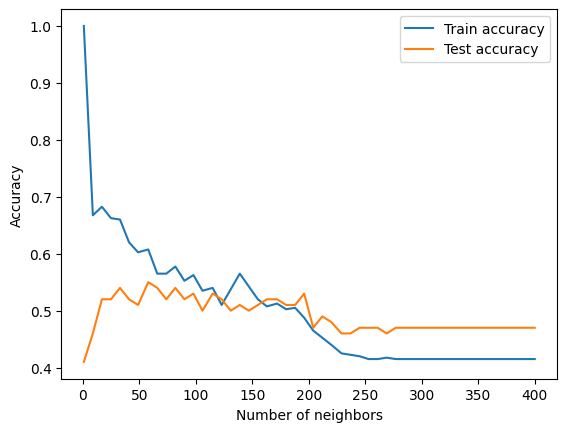

In [ ]:
### CELL TO BE COMPLETED 
# train a KNN classifier and test it for different number of neighbors
from sklearn.neighbors import KNeighborsClassifier

# List to store training accuracies for each value of k
train_accuracies = []

# List to store test accuracies for each value of k
test_accuracies = []

# Values of k to test
k_values = np.linspace(1, 400, 50, dtype=int)

# Iterate over the values of k
for k in k_values:

    # Train a KNN classifier on training data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Evaluate classifier performance on training data
    train_accuracy = knn.score(X_train, Y_train)
    train_accuracies.append(train_accuracy)

    # Evaluate classifier performance on test data
    test_accuracy = knn.score(X_test, Y_test)
    test_accuracies.append(test_accuracy)

# Plot the precision curves as a function of k
plt.plot(k_values, train_accuracies, label='Train accuracy')
plt.plot(k_values, test_accuracies, label='Test accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
### CELL TO BE COMPLETED 
#  Generate the report and confusion matrix for the test set.
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set using the trained KNN classifier
y_pred = knn.predict(X_test)

# Generate the classification report for the test set
print("Classification Report:\n")
print(classification_report(Y_test, y_pred))

# Generate the confusion matrix for the test set
cm = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix:\n")
print(cm)


Classification Report:

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        29
         0.0       0.47      1.00      0.64        47
         1.0       0.00      0.00      0.00        24

    accuracy                           0.47       100
   macro avg       0.16      0.33      0.21       100
weighted avg       0.22      0.47      0.30       100


Confusion Matrix:

[[ 0 29  0]
 [ 0 47  0]
 [ 0 24  0]]


c:\Users\grego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\grego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\grego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now explore the performances of the KNN classifier with other maze dimentions and number of cheeses..

In [ ]:
# Dictionary to store average/dif/bias/variance accuracies for each combination of k and nb_cheeses/width/height
test_acc = {}
train_acc = {}
avg_acc = {}
dif_acc = {}
bias = {}
variance = {}

nb_games = 100


nb_cheeses = np.linspace(1, 40, 5)
maze_widths = np.linspace(2, 40, 5)
maze_heights = np.linspace(2, 40, 5)

# List of values for k
k_list = list(range(1, 50))


# Iterate over all combinations of nb_cheese, maze_width, maze_height and k
for nb_cheese in nb_cheeses:
    for maze_width in maze_widths:
        for maze_height in maze_heights:
            dataset_folder = "../../../DATASETS_SAILLY_GREGORY/"

            file_path = f"{dataset_folder}/{int(nb_games)}_games_{int(nb_cheese)}_cheeses_{int(maze_width)}x{int(maze_height)}.npz"
            if os.path.exists(file_path):
                file = np.load(file_path)
                X = file["cheeses"]
                Y = file["winners"]
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
                for k in k_list:
                    if k != 1:
                        knn = KNeighborsClassifier(n_neighbors=k)
                        knn.fit(X_train, Y_train)

                        train_accuracy = knn.score(X_train, Y_train)
                        train_accuracies.append(train_accuracy)

                        test_accuracy = knn.score(X_test, Y_test)
                        test_accuracies.append(test_accuracy)

                        test_acc[(nb_cheese, maze_width, maze_height, k)] = test_accuracy
                        train_acc[(nb_cheese, maze_width, maze_height, k)] = train_accuracy

                        average_accuracy = np.mean([train_accuracy, test_accuracy])
                        avg_acc[(nb_cheese, maze_width, maze_height, k)]= average_accuracy

                        difference_accuracy = abs(train_accuracy - test_accuracy)
                        dif_acc[(nb_cheese, maze_width, maze_height, k)] = difference_accuracy

                        bias_value = train_accuracy - np.mean([train_accuracy, test_accuracy])
                        bias[(nb_cheese, maze_width, maze_height, k)] = bias_value

                        variance_value = np.mean([(train_accuracy - np.mean([train_accuracy, test_accuracy]))**2, (test_accuracy - np.mean([train_accuracy, test_accuracy]))**2])
                        variance[(nb_cheese, maze_width, maze_height, k)] = variance_value
        
            else:
                print("Le fichier spécifié n'existe pas.")

# Sort the dictionary by average accuracy in descending order
sorted_avg_acc = sorted(avg_acc.items(), key=lambda x: x[1], reverse=True)

# Sort the dictionary by difference accuracy in ascending order
sorted_dif_acc = sorted(dif_acc.items(), key=lambda x: x[1], reverse=False)

# Sort the dictionary by bias in ascending order
sorted_bias = sorted(bias.items(), key=lambda x: x[1], reverse=False)

# Sort the dictionary by variance in ascending order
sorted_variance = sorted(variance.items(), key=lambda x: x[1], reverse=False)


# Print the top 10 combinations of k and train/test size with the highest average accuracy
print("Top 10 combinations of k and train/test size with the highest average accuracy:")
for i in range(10):
    print(f"{sorted_avg_acc[i][0]}: {sorted_avg_acc[i][1]:.4f}")

# Print the top 10 combinations of k and train/test size with the lowest difference between training and testing accuracy
print("\nTop 10 combinations of k and train/test size with the lowest difference between training and testing accuracy:")
for i in range(10):
    print(f"{sorted_dif_acc[i][0]}: {sorted_dif_acc[i][1]:.4f}")

# Print the top 10 combinations of k and train/test size with the lowest bias
print("\nTop 10 combinations of k and train/test size with the lowest bias:")
for i in range(10):
    print(f"{sorted_bias[i][0]}: {sorted_bias[i][1]:.4f}")
    
# Print the top 10 combinations of k and train/test size with the lowest variance
print("\nTop 10 combinations of k and train/test size with the lowest variance:")
for i in range(10):
    print(f"{sorted_variance[i][0]}: {sorted_variance[i][1]:.4f}")

Le fichier spécifié n'existe pas.
Le fichier spécifié n'existe pas.
Le fichier spécifié n'existe pas.
Le fichier spécifié n'existe pas.
Le fichier spécifié n'existe pas.
Le fichier spécifié n'existe pas.
Le fichier spécifié n'existe pas.
Le fichier spécifié n'existe pas.
Top 10 combinations of k and train/test size with the highest average accuracy:
(1.0, 2.0, 2.0, 2): 1.0000
(1.0, 2.0, 2.0, 3): 1.0000
(1.0, 2.0, 2.0, 4): 1.0000
(1.0, 2.0, 2.0, 5): 1.0000
(1.0, 2.0, 2.0, 6): 1.0000
(1.0, 2.0, 2.0, 7): 1.0000
(1.0, 2.0, 2.0, 8): 1.0000
(1.0, 2.0, 2.0, 9): 1.0000
(1.0, 2.0, 2.0, 10): 1.0000
(1.0, 2.0, 2.0, 11): 1.0000

Top 10 combinations of k and train/test size with the lowest difference between training and testing accuracy:
(1.0, 2.0, 2.0, 2): 0.0000
(1.0, 2.0, 2.0, 3): 0.0000
(1.0, 2.0, 2.0, 4): 0.0000
(1.0, 2.0, 2.0, 5): 0.0000
(1.0, 2.0, 2.0, 6): 0.0000
(1.0, 2.0, 2.0, 7): 0.0000
(1.0, 2.0, 2.0, 8): 0.0000
(1.0, 2.0, 2.0, 9): 0.0000
(1.0, 2.0, 2.0, 10): 0.0000
(1.0, 2.0, 2.0, 11):